In [25]:
from importlib import reload
import os, sys
%pylab inline
os.environ["GIT"]

Populating the interactive namespace from numpy and matplotlib


'/Users/stootoon/git'

In [36]:
git_path = os.environ["GIT"]
proj_dir = f"{git_path}/mctavish-2012"
sys.path.append(proj_dir+"/src")
os.chdir(proj_dir)

In [38]:
from params import sim_var
import bulbspikes as bs
import neuronpy; reload(neuronpy)
import neuronpy.util as nu; reload(nu)
from neuronpy.util import spiketrain
reload(spiketrain)

<module 'neuronpy.util.spiketrain' from '/Users/stootoon/anaconda3/envs/amblr_py38/lib/python3.8/site-packages/neuronpy/util/spiketrain.py'>

In [39]:
bulb_spikes = bs.BulbSpikes(sim_time = sim_var["tstop"])
bulb_spikes.read_file(os.path.join(proj_dir, "spikeout.spk"))

In [40]:
sim_var["tstop"]

20000

In [41]:
spikes = bulb_spikes.get_mitral_spikes()
pair = [0, 4]
ref=spikes[pair[0]]
comp = spikes[pair[1]]
coincidences, mask_a, mask_b, ratio = spiketrain.get_sync_traits(ref, comp, window=5)

In [42]:
phi_vec = spiketrain.coincident_spikes_correlogram(ref, comp, window=5)

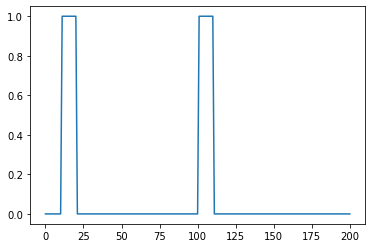

In [43]:
plot(phi_vec)

In [12]:
len(spikes)

5